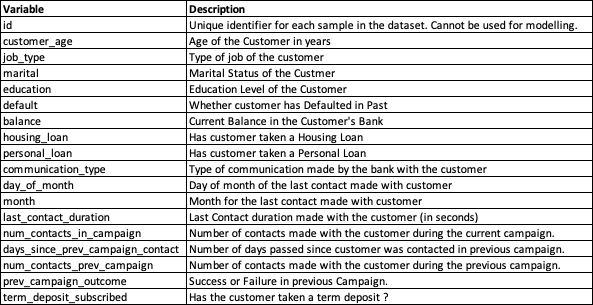

1. Variable **'id'** is *Identifier* column. It has a unique value for every sample in the dataset and cannot be used for modelling.
2.  Variable **'term_deposit_subscribed'** is *Target/y* column. It has binary values and we need to learn to predict this variable given our above 16 variables as features.

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Importing data (train, test, sample submission)

In [3]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\classification\\term deposit\\train.csv',parse_dates = [1])
test=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\classification\\term deposit\\\\test.csv',parse_dates = [1])
ss=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\classification\\term deposit\\\\sample_sub.csv')

train.shape, test.shape, ss.shape

((31647, 18), (13564, 17), (13564, 2))

In [4]:
train.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


# Check 1 : Balanced Data or Not

Target Distribution: Ratio

In [5]:
train['term_deposit_subscribed'].value_counts(normalize=True)

0    0.892754
1    0.107246
Name: term_deposit_subscribed, dtype: float64

Target Distribution: Visually

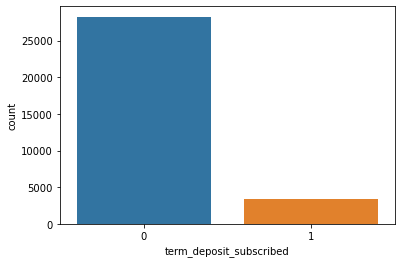

In [6]:
sns.countplot(train['term_deposit_subscribed'])

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  object 
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [8]:
ID_COL, TARGET_COL = 'id', 'term_deposit_subscribed'

# Feature Engineering 1 : Changing Datatypes

In [9]:
train['customer_age']=train['customer_age'].astype(float)

# (Univariate + Bivariate Analysis)

In [144]:
import dtale
dtale.show(train)
dtale.show(train, ignore_duplicate=True)

# Hypothesis Generation

For each numerical Variable. We will plot the median of the numerical variable for:

When term_deposit_subscribed == 0
when term_deposit_subscribed == 1
**We are choosing median since median is not affected by outliers, and our data has a lot of outlers**

Following observations from EDA
1. Married people have more chances of subscribing to a term deposit ?
No, **Single people have more chances of subscribing to a term deposit**
2. Do people with a higher bank balance more likely subscribe to term deposit than people with low balance ? **Yes**
3. Does the length of the call made to the customers tell us anything about their chances of subscribing ? **Yes**
4. Are younger customers more likely to subscribe to a term deposit as compared to old customers ? **It's not very clear from our above plot since we have median age of around 40 for both cases**
5. Does Owning a housing loan led to higher subscription rate? **No**
6. Does owning a personal loan led to higher subscription rate? **No**

# Check 2: NaN values (%)

Percentage of NaN/Null values in Train data.

In [10]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

days_since_prev_campaign_contact    81.6
customer_age                         2.0
balance                              1.3
last_contact_duration                1.0
personal_loan                        0.5
marital                              0.5
num_contacts_in_campaign             0.4
job_type                             0.0
education                            0.0
default                              0.0
term_deposit_subscribed              0.0
housing_loan                         0.0
prev_campaign_outcome                0.0
communication_type                   0.0
day_of_month                         0.0
month                                0.0
num_contacts_prev_campaign           0.0
id                                   0.0
dtype: float64

One feature **'days_since_prev_campaign_contact'** has a lot of **null values around 81.6 %**, which might mean that these customers were never reached out in the previous campaign.
There are few missing values in customer age, balance, last contact duration, personal loan, marital status & number of contacts in campaign

# Numerical and Categorical Features

Let us segregate numeric and categorical features for more clarity

In [11]:
features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
cat_cols = train.select_dtypes(include=['object'])

# categorical features
cat_cols = [c for c in features if c in cat_cols]

# numerical features
num_cols = [n for n in features if n not in cat_cols]

print('categorical variables')
display(cat_cols)
print('numerical variables')
display(num_cols)

categorical variables


['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

numerical variables


['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

Outliers in numerical variables

customer_age
0
balance
1
day_of_month
2
last_contact_duration
3
num_contacts_in_campaign
4
days_since_prev_campaign_contact
5
num_contacts_prev_campaign
6


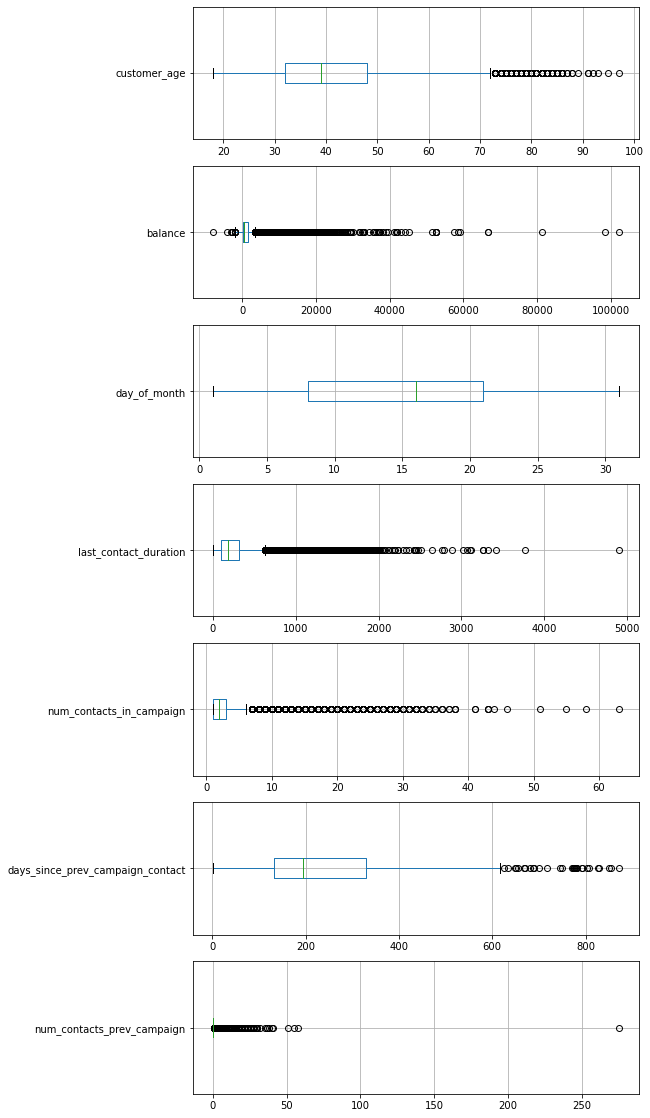

In [147]:
fig, axes = plt.subplots(7, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
        print(c)
        print(i)
        _ = train[[c]].boxplot(ax=axes[i], vert=False)

# Merge Train + Test 

Let us merge train and test for faster manipulation of data

In [12]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [13]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.tail()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
45206,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,jun,94.0,1.0,NaN,0,unknown,NaN
45207,id_14483,NaN,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,jul,155.0,1.0,NaN,0,unknown,NaN
45208,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,may,231.0,4.0,NaN,0,unknown,NaN
45209,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,may,243.0,2.0,299.0,5,failure,NaN
45210,id_12898,51.0,technician,married,unknown,no,368.0,yes,no,cellular,15,jul,102.0,2.0,NaN,0,unknown,NaN


In [14]:
df.shape

(45211, 18)

In [15]:
df.isnull().any()

id                                  False
customer_age                         True
job_type                            False
marital                              True
education                           False
default                             False
balance                              True
housing_loan                        False
personal_loan                        True
communication_type                  False
day_of_month                        False
month                               False
last_contact_duration                True
num_contacts_in_campaign             True
days_since_prev_campaign_contact     True
num_contacts_prev_campaign          False
prev_campaign_outcome               False
term_deposit_subscribed              True
dtype: bool

# Feature Engineeing 2: Handling Cat. labels

In [20]:
df = pd.get_dummies(df, columns= cat_cols)

In [21]:
df.head()

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_43823,28.0,285,26,303,4,194,0,0.0,0,...,1,0,0,0,0,0,0,0,0,1
1,id_32289,34.0,934,18,143,2,132,1,0.0,0,...,0,0,0,1,0,0,0,1,0,0
2,id_10523,46.0,656,5,101,4,194,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,id_43951,34.0,2,20,127,3,194,0,0.0,0,...,0,0,1,0,0,0,0,0,0,1
4,id_40992,41.0,1352,13,49,2,194,0,0.0,0,...,0,0,1,0,0,0,0,0,0,1


In [22]:
df.isnull().any()

id                                  False
customer_age                        False
balance                             False
day_of_month                        False
last_contact_duration               False
num_contacts_in_campaign            False
days_since_prev_campaign_contact    False
num_contacts_prev_campaign          False
term_deposit_subscribed              True
job_type_admin.                     False
job_type_blue-collar                False
job_type_entrepreneur               False
job_type_housemaid                  False
job_type_management                 False
job_type_retired                    False
job_type_self-employed              False
job_type_services                   False
job_type_student                    False
job_type_technician                 False
job_type_unemployed                 False
marital_divorced                    False
marital_married                     False
marital_nan                         False
marital_single                    

# Feature Engineering 2: Imputing Missing Values

In [17]:
for column in cat_cols:
    mode = df[column].mode()[0]
    df[column] = df[column].replace('unknown',mode)
    df[column] = df[column].replace('nan',mode)
    
for column in num_cols:
    median = df[column].median()
    df[column].fillna(median,inplace = True)
    df[column] = df[column].replace('NaN',median)

# Feature Engineering 3: Changing Datatypes

In [18]:
df['days_since_prev_campaign_contact']=df['days_since_prev_campaign_contact'].astype(int)
df['num_contacts_in_campaign']=df['num_contacts_in_campaign'].astype(int)
df['last_contact_duration']=df['last_contact_duration'].astype(int)
df['personal_loan']=df['personal_loan'].astype(str)
df['balance']=df['balance'].astype(int)
df['marital']=df['marital'].astype(str)
df['customer_age']=df['customer_age'].astype(float)

In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# Processing back the Train, Test Data

Once done with manipulation of whole data, lets process back data into train and test 

In [23]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [24]:
train_proc.shape, test_proc.shape

((31647, 52), (13564, 52))

**train_proc data  = trn data + val data**

We will use 80-20 split with 80% of the rows belonging to training data. Stratified Sampling is necessary, since the dataset is highly imbalanced. Stratified sampling ensures that the minority class is distributed proportionally among the two classes.

In [25]:
trn, val = train_test_split(train_proc, test_size=0.2, random_state = 1, stratify = train_proc[TARGET_COL])

###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

In [26]:
train_proc.shape,  X_trn.shape,  X_val.shape,  test_proc.shape,   ss.shape

((31647, 52), (25317, 50), (6330, 50), (13564, 52), (13564, 2))

# 1. Base Line model : Logistic Regression

Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
_ = scaler.fit(X_trn)

X_trn = scaler.transform(X_trn)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Validation Score

In [28]:
clf = LogisticRegression(random_state = 1)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.46981132075471693

**Submitting Prediction on Leaderboard**

In [29]:
preds_test = clf.predict(X_test)

In [30]:
#Preparing sample submission
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [31]:
ss.head(1)

,id
0,id_17231


In [32]:
#storing in sample submission
ss['term_deposit_subscribed']=preds_test
#formating sample submission
ss['id']=ss['id'].astype(str)
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss=ss.set_index('id')
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\1_scaledLG.csv')

1. private score : **0.4349** (validation:0.47)
2. Had it been a live contest, your **rank would be : 79**

***************************

# 2. Baseline Classification Model: Decision Tree

Although trees don't require the data to be normalized, since our data is already normalized we will work with that.

Validation Score

In [33]:
clf = DecisionTreeClassifier(random_state = 1)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict(X_val)

f1_score(y_val, preds_val)

0.4855233853006682

Decision Trees so far have given us the best validation score.

**Submitting Prediction on the Leaderboard**

In [34]:
preds_test=clf.predict(X_test)

In [35]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [36]:
ss.head(1)

""
id
id_17231


In [37]:
#storing to sample submission
ss['term_deposit_subscribed']=preds_test
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\2_DecisionTree.csv')

1. private score  : **0.453** (Validation 0.48) 
2. Had it been a live contest, your **rank would be : 78**

**********************

*********************

# 3.  Decision Tree (Hyperparameter Tuned)

In [38]:
from sklearn.model_selection import RandomizedSearchCV

Decision Tree Classifier Params to tune

In [39]:
param={
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128],
    'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
}

Tuning params

In [40]:
clf = RandomizedSearchCV(DecisionTreeClassifier(),
                        param,
                        n_iter=20,
                        scoring='f1',
                        random_state=1)

Param results

In [41]:
search=clf.fit(train_proc[features],train_proc[TARGET_COL ])
search.best_params_

{'min_samples_split': 20,
 'max_leaf_nodes': 32,
 'max_features': 0.8,
 'max_depth': 10,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

Saving param results

In [42]:
optimal_params={'min_samples_split': 20,
 'max_leaf_nodes': 64,
 'max_features': 0.8,
 'max_depth': 12,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 3}}

Validation Score

In [43]:
clf=DecisionTreeClassifier(random_state=1, **optimal_params)
_=clf.fit(X_trn,y_trn)

In [44]:
preds_val=clf.predict(X_val)

In [45]:
f1_score(y_val,preds_val)

0.5882352941176471

**Submitting Prediction on the Leaderboard**

In [46]:
preds_test=clf.predict(X_test)

In [47]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [48]:
ss.head(1)

""
id
id_17231


In [49]:
#storing to sample submission
ss['term_deposit_subscribed']=preds_test
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\3_tunedtree.csv')

1. private score : **0.5710** (validation score :0.588)
2. Had it been a live contest, your rank would be : 51

********************************

*************************

**Problems with simple train_test_split validation**

* We are not using complete 100 % of the dataset for training. More data implies more performance, if the data quality is good.

* We are not using complete 100 % of the dataset for validation. Our validation now is biased towards the validation set we have got through train_test_split. What if the test set is different from the validation set ?


# Validation Strategy

1. KFold :           Balanced Target Distrbution
2. Startified KFold: Imbalanced Target Distrbution

# **K-Fold Validation**
K Fold validation splits the dataset into K-parts or K-splits.

Suppose we are performing a 5-fold validation. Thus we split the training dataset into 5 parts. Each of these will contain 20 % of the dataset.


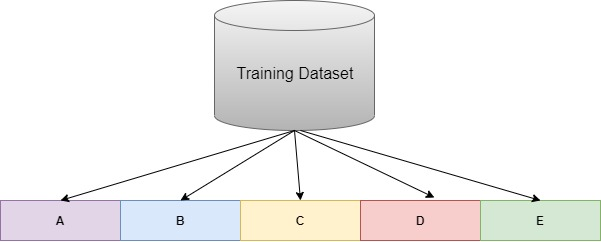

Now for each of these parts, we take them as validation one by one and rest of the parts for training. The unshaded or white box, represents the part among A, B, C, D, and E, that we take for validation. Rest are used for training in that particular fold.
Then we make two predictions (shown in the right hand side of the diagram):

**1. Predictions for the validation set:** This is also known as out-of-fold prediction.

**2. Predictions for the test set:** This is the dataset for which we need to submit our predictions to AV.

Finally if we combine the predictions for each of these folds we get OOFs or Out-of-Folds predictions. This is the prediction for the entire dataset. We can now see the performance our classifier on the entire training set.

Also we take the mean of the test predictions for each fold, and get our final test_predictions. We then need to round it to 0 or 1, since our metric demands we submit a discrete output, ie. no probabilities. 

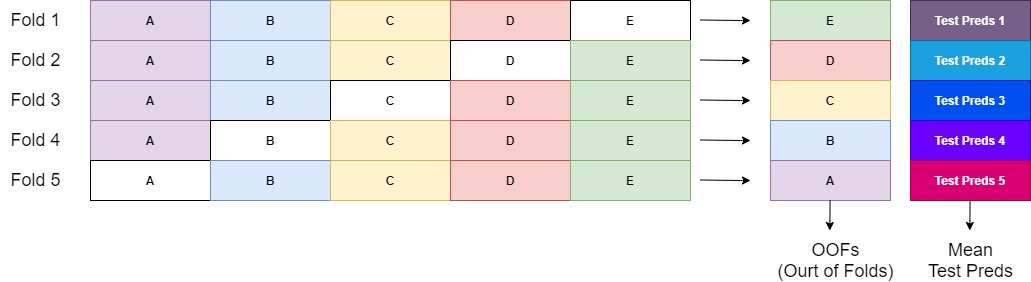

## **Stratified K-Fold.**

One obvious problem with normal KFold, is that each in each fold the distribution of classes in the validation set, will be not be same. This is a big problem with imbalanced datasets. 

In our above example its possible that in any of the splits we could have could have a validation set with no positive examples. 

To overcome this problem we will use Stratified-KFold Validation. StratifiedKFold ensures that each of the splits have same proportion of examples of each class.



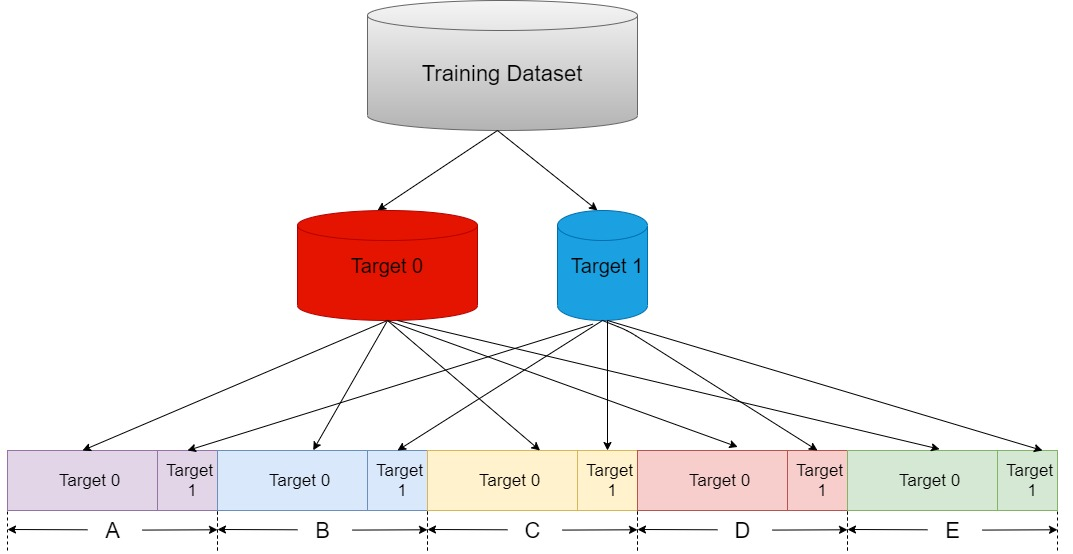

# 4.  Decision Tree Model (Tuned + Stratified KFold Validation)

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

In [51]:
target=train[TARGET_COL]

**Function to Run KFold**

In [52]:
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))        #train prediction
  preds = np.zeros((len(test)))      #test prediction

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]    #oofs precdiction
    preds_test = clf.predict_proba(X_test)[:, 1]  #test prediction

    fold_score = f1_score(y_val, preds_val.round())   #fold score
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS                #mean test prediction

   
   
    
  oofs_score = f1_score(target, oofs.round())    #combined OOFS score
  print(f'\n\nF1 score for oofs is {oofs_score}')

  return oofs, preds

In [53]:
dt_params = {'class_weight': {0: 1, 1: 3},
             'criterion': 'gini',
             'max_depth': 10,
             'max_features': 0.8,
             'max_leaf_nodes': 32,
             'min_samples_split': 20,
             'random_state': 1
             }

Validation Score

In [54]:
#With tuning
clf = DecisionTreeClassifier(**dt_params)
dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, features)


------------- Fold 1 -------------

F1 score for validation set is 0.5947136563876653

------------- Fold 2 -------------

F1 score for validation set is 0.5905598243688255

------------- Fold 3 -------------

F1 score for validation set is 0.590988882387361

------------- Fold 4 -------------

F1 score for validation set is 0.562874251497006

------------- Fold 5 -------------

F1 score for validation set is 0.5837053571428571


F1 score for oofs is 0.5844474153297682


**Submitting Prediction on the Leaderboard**

In [55]:
dt_preds_rounded=dt_preds.round()

In [56]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [57]:
#storing to sample submission
ss['term_deposit_subscribed']=dt_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\4_tuned_tree_startified_kfold.csv')

1. Your private score for this submission is : **0.5776** (Validation Score:0.5837)
2. Had it been a live contest, your rank would be : 50

******

*********************

********************

# **Gradient Boosting**  - NaN filling is not required

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

https://en.wikipedia.org/wiki/Gradient_boosting

https://www.analyticsvidhya.com/blog/2020/02/4-boosting-algorithms-machine-learning/

Most Popular Variants of GradientBoosting
----------------------------

1. LightGBM

2. XGBoost

3. CatBoost

 ## 5. **LightGBM** Model

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.

* Lower memory usage.

* Better accuracy.

* Support of parallel and GPU learning.

* Capable of handling large-scale data.

https://lightgbm.readthedocs.io/en/latest/

In [58]:
from lightgbm import LGBMClassifier

In [59]:
#Without tuning
clf=LGBMClassifier()
lgbm_oofs,lgb_preds=run_clf_kfold(clf,train_proc,test_proc,features)


------------- Fold 1 -------------

F1 score for validation set is 0.5555555555555555

------------- Fold 2 -------------

F1 score for validation set is 0.5767668562144598

------------- Fold 3 -------------

F1 score for validation set is 0.5422885572139304

------------- Fold 4 -------------

F1 score for validation set is 0.5553719008264464

------------- Fold 5 -------------

F1 score for validation set is 0.5509181969949916


F1 score for oofs is 0.556271690629648


**Submitting Prediction on the Leaderboard**

In [60]:
lgb_preds_rounded=lgb_preds.round()

In [61]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [62]:
#storing to sample submission
ss['term_deposit_subscribed']=lgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\5_LGBM.csv')

1. Your private score for this submission is : **0.54** (Validation Score:0.55)
2. Had it been a live contest, your rank would be : 59

### **Lets improve LGBM F1_Score with Threshold optimization**

Rounding off means you are selecting a threshold of 0.5. Any predictions with probabilities greater than or equal to 0.5 will be rounded to 1, rest will be rounded to 0.

But is 0.5 the best threshold to get an optimal F1-score ?

Lets verify it ourselves by running all threholds from 0.01,0.02 to 0.99.

# 6. **LightGBM** Model (Optimzed Threshold)

In [1]:
def get_optimal_f1_thresh(target, oofs):
  thresholds = np.arange(0, 100)/100
  thresh_scores = []
  for thresh in thresholds:
    oofs_rounded = (lgbm_oofs > thresh) * 1
    thresh_score = f1_score(target, oofs_rounded)
    thresh_scores.append(thresh_score)
  
  all_thresholds_and_scores = pd.Series(index = thresholds, data = thresh_scores)
  all_thresholds_and_scores.plot(figsize=(10, 6), fontsize=14)
  
  plt.xlabel('Threshold', fontsize=14)
  plt.ylabel('F1 Score', fontsize=14)

  return all_thresholds_and_scores.sort_values(ascending=False).index.values[0]

Optimal threhold is 0.28


0.636117936117936

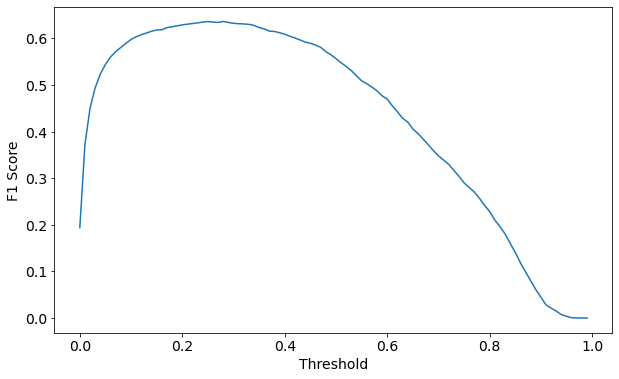

In [64]:
optimal_thresh = get_optimal_f1_thresh(target, lgbm_oofs)
print(f'Optimal threhold is {optimal_thresh}')
f1_score(target, (lgbm_oofs > optimal_thresh) * 1)

**Submitting Prediction on the Leaderboard**

In [65]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [66]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [67]:
#storing to sample submission
ss['term_deposit_subscribed']=lgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\6_LGBM_threshold.csv')

1. Your private score for this submission is : **0.62** (Validation Score:0.63)
2. Had it been a live contest, your rank would be : 42

# 7.  **Tuning LightGBM (Threshold)**

* Early Stopping: Stopping the model training, when the model starts to overfit
  * How do we know if model is overfitting ?
* HyperParameter Optimization.
  * Is random search the best way to go ?

**Simple Function to Run Gradient Boosting**

Let's make a simple function to call gradient boosting and get our oofs and predictions. Rather than copying and pasting the same code again and again/

In [68]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  folds = StratifiedKFold(n_splits = N_SPLITS)

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, train[TARGET_COL])):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict_proba(X_val)[:, 1]
    preds_test = clf.predict_proba(X_test)[:, 1]

    fold_score = f1_score(y_val, preds_val.round())
    print(f'\nF1 score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = f1_score(target, oofs.round())
  print(f'\n\nF1 score for oofs is {oofs_score}')

  return oofs, preds

**Manual Tuning. Choosing Hyperparameters to Tune**


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.174395
[200]	valid_0's binary_logloss: 0.173044
Early stopping, best iteration is:
[150]	valid_0's binary_logloss: 0.172881

F1 score for validation set is 0.5527896995708154

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.170776
[200]	valid_0's binary_logloss: 0.167442
[300]	valid_0's binary_logloss: 0.166989
[400]	valid_0's binary_logloss: 0.167057
Early stopping, best iteration is:
[312]	valid_0's binary_logloss: 0.166653

F1 score for validation set is 0.5811258278145696

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.177149
[200]	valid_0's binary_logloss: 0.172862
[300]	valid_0's binary_logloss: 0.172211
[400]	valid_0's binary_logloss: 0.172444
Early stopping, best iteration is:
[310]	v

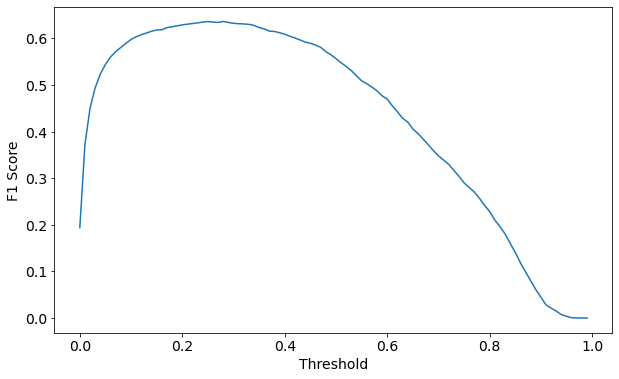

In [69]:
clf = LGBMClassifier(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100}

lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting Prediction on the Leaderboard**

In [70]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [71]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [72]:
#storing to sample submission
ss['term_deposit_subscribed']=lgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\7_tuned_LGBM_threshold.csv')

1. Your private score for this submission is : **0.619** (Validation Score:0.63)
2. Had it been a live contest, your rank would be : 43

**0.619**, CV increased but LB decreased

# 8.  **Tuning LightGBM (Threshold+ Learnig Rate) **

* Early Stopping: Stopping the model training, when the model starts to overfit
  * How do we know if model is overfitting ?
* HyperParameter Optimization.
  * Is random search the best way to go ?

**Tuning Learning Rate**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.194536
[400]	valid_0's binary_logloss: 0.177268
[600]	valid_0's binary_logloss: 0.173064
[800]	valid_0's binary_logloss: 0.172787
Early stopping, best iteration is:
[711]	valid_0's binary_logloss: 0.172717

F1 score for validation set is 0.5536332179930796

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.194343
[400]	valid_0's binary_logloss: 0.175432
[600]	valid_0's binary_logloss: 0.169235
[800]	valid_0's binary_logloss: 0.167599
[1000]	valid_0's binary_logloss: 0.166843
[1200]	valid_0's binary_logloss: 0.16642
[1400]	valid_0's binary_logloss: 0.165943
[1600]	valid_0's binary_logloss: 0.165836
Early stopping, best iteration is:
[1489]	valid_0's binary_logloss: 0.165793

F1 score for validation set is 0.5768911055694098

------------- Fold 3 -------------
Training until val

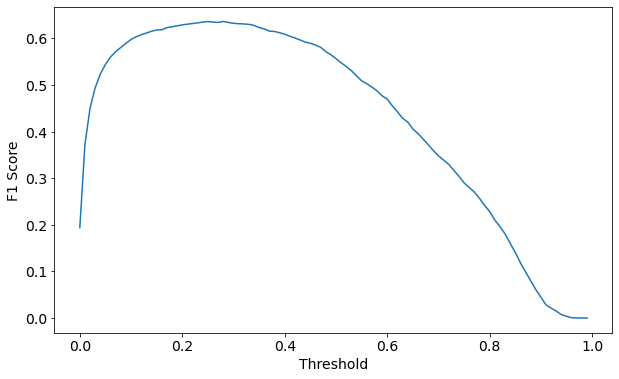

In [73]:
clf = LGBMClassifier(n_estimators = 2000,
                     learning_rate = 0.01,        #Should not be less than 0.01
                     colsample_bytree = 0.65,
                     random_state = 2)
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

Submitting Prediction on the Leaderboard

In [74]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [75]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [76]:
#storing to sample submission
ss['term_deposit_subscribed']=lgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\8_tuned_LGBM_threshold_leaningrate.csv')

1. Your private score for this submission is : **0.622** (Validation Score:0.64)
2. Had it been a live contest, your rank would be : 41

CV and LB both increased Yay

## 9  **CatBoost Model**

CatBoost is a high-performance open source library for gradient boosting on decision trees.

Features

* Great quality without parameter tuning: Reduce time spent on parameter tuning, because CatBoost provides great results with default parameters

* Categorical features support: Improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers.

* Fast and scalable GPU version: Train your model on a fast implementation of gradient-boosting algorithm for GPU. Use a multi-card configuration for large datasets.

* Improved accuracy: Reduce overfitting when constructing your models with a novel gradient-boosting scheme.

* Fast prediction: Apply your trained model quickly and efficiently even to latency-critical tasks using CatBoost's model applier

https://catboost.ai/


------------- Fold 1 -------------
0:	learn: 0.6807088	test: 0.6807260	best: 0.6807260 (0)	total: 216ms	remaining: 10m 48s
200:	learn: 0.2080913	test: 0.2070004	best: 0.2070004 (200)	total: 5.12s	remaining: 1m 11s
400:	learn: 0.1866712	test: 0.1876612	best: 0.1876612 (400)	total: 8.22s	remaining: 53.3s
600:	learn: 0.1762329	test: 0.1804846	best: 0.1804824 (599)	total: 11.1s	remaining: 44.2s
800:	learn: 0.1688760	test: 0.1765777	best: 0.1765777 (800)	total: 13.8s	remaining: 37.8s
1000:	learn: 0.1630779	test: 0.1741488	best: 0.1741488 (1000)	total: 16.3s	remaining: 32.6s
1200:	learn: 0.1580985	test: 0.1726202	best: 0.1726202 (1200)	total: 18.7s	remaining: 28s
1400:	learn: 0.1538674	test: 0.1715807	best: 0.1715807 (1400)	total: 21.5s	remaining: 24.5s
1600:	learn: 0.1498610	test: 0.1707187	best: 0.1707187 (1600)	total: 24s	remaining: 21s
1800:	learn: 0.1463616	test: 0.1701887	best: 0.1701887 (1800)	total: 26.5s	remaining: 17.6s
2000:	learn: 0.1430368	test: 0.1697013	best: 0.1696864 (1984)

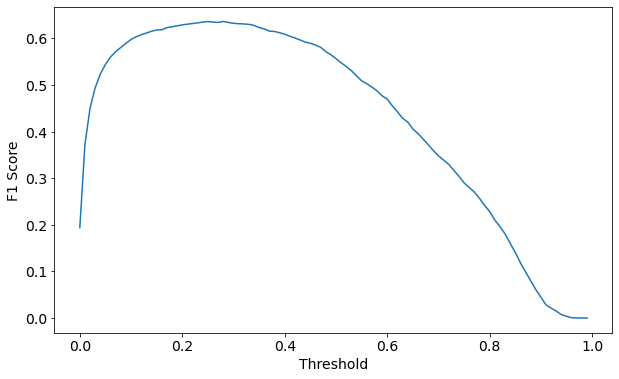

In [77]:
clf = CatBoostClassifier(n_estimators = 3000,
                       learning_rate = 0.01,
                       rsm = 0.4, ## Analogous to colsample_bytree
                       random_state=2054,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, cb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (cb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting Prediction on the Leaderboard**

In [78]:
cb_preds_rounded = (cb_preds > optimal_thresh) * 1

In [79]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [80]:
#storing to sample submission
ss['term_deposit_subscribed']=cb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\9_Catboost_Threshold.csv')

1. Your private score for this submission is : **0.6287** (Validation Score:0.64)
2. Had it been a live contest, your rank would be : 40

## 10 **XGBoost Model**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

https://xgboost.readthedocs.io/en/latest/


------------- Fold 1 -------------
[0]	validation_0-error:0.08705
Will train until validation_0-error hasn't improved in 200 rounds.
[200]	validation_0-error:0.08420
Stopping. Best iteration:
[161]	validation_0-error:0.08278


F1 score for validation set is 0.5245009074410163

------------- Fold 2 -------------
[0]	validation_0-error:0.08752
Will train until validation_0-error hasn't improved in 200 rounds.
[200]	validation_0-error:0.07899
Stopping. Best iteration:
[194]	validation_0-error:0.07852


F1 score for validation set is 0.5605658709106984

------------- Fold 3 -------------
[0]	validation_0-error:0.08959
Will train until validation_0-error hasn't improved in 200 rounds.
[200]	validation_0-error:0.08911
[400]	validation_0-error:0.08896
Stopping. Best iteration:
[245]	validation_0-error:0.08722


F1 score for validation set is 0.519163763066202

------------- Fold 4 -------------
[0]	validation_0-error:0.08959
Will train until validation_0-error hasn't improved in 200 rounds.


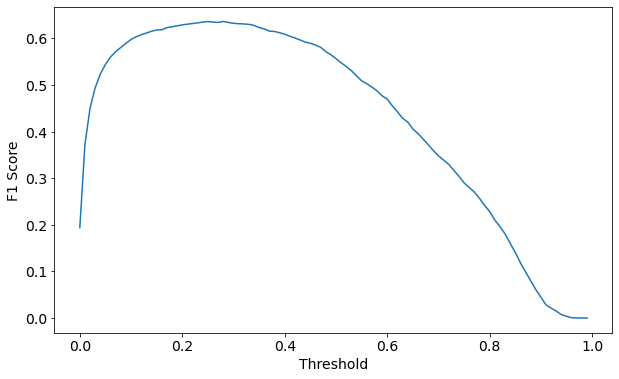

In [81]:
clf = XGBClassifier(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                    )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, xgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (xgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting Prediction on the Leaderboard**

In [82]:
xgb_preds_rounded = (xgb_preds > optimal_thresh) * 1

In [83]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)
#storing to sample submission
ss['term_deposit_subscribed']=xgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\10_XGboost_Threshold.csv')


1. Your private score for this submission is : **0.615** (Validation Score:0.627)
2. Had it been a live contest, your rank would be : 43

# **Feature Engineering**

* What does a model know about a sample ?

* What the model does not know about the sample ?

* How do we provide that unknown information to the model ?


***Feature Engineering is one of the biggest difference maker in any ML competition.*** 

<br>
<br>

**Helper Functions**

In [1]:
def join_df(train, test):

  df = pd.concat([train, test], axis=0).reset_index(drop = True)
  features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]

  return df, features

def split_df_and_get_features(df, train_nrows):

  train, test = df[:train_nrows].reset_index(drop = True), df[train_nrows:].reset_index(drop = True)
  features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
  
  return train, test, features

In [90]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [98]:
df, features = join_df(train, test)

### Label Encoding
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

#### No NaN filling required.

In [100]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28,0,0,0,0,285.0,0,0,0,26,0,303.0,4.0,NaN,0,0,0.0
1,id_32289,34,1,1,1,0,934.0,1,1,1,18,1,143.0,2.0,132.0,1,1,0.0
2,id_10523,46,2,1,1,0,656.0,1,0,1,5,2,101.0,4.0,NaN,0,0,0.0
3,id_43951,34,3,0,1,0,2.0,0,0,0,20,3,127.0,3.0,NaN,0,0,0.0
4,id_40992,41,1,1,2,0,1352.0,0,0,1,13,3,49.0,2.0,NaN,0,0,0.0


Are we missing something compared to our previous set of steps ?

<br>
<br>
<br>
<br>
<br>
<br>

**NaN filling is not required**

## **Frequency Features**

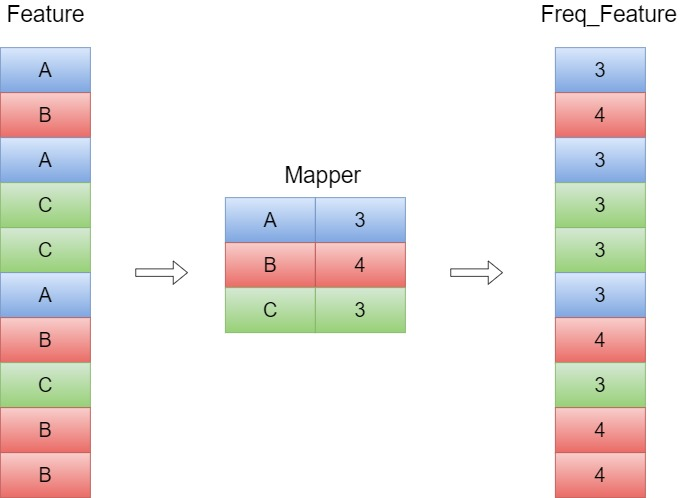

Function to return a df with frequency features

In [2]:
def get_frequency_features(df, cols):

  df[[c + '_freq' for c in cols]] = df[cols].apply(lambda x: x.map(x.value_counts()))
  
  return df

Criteria for seleting colmns for frequecy feture

In [108]:
freq_cols = [c for c in df.columns if (train[c].nunique() > 10) and (train[c].nunique() < 50)]
freq_cols

['job_type',
 'day_of_month',
 'month',
 'num_contacts_in_campaign',
 'num_contacts_prev_campaign']

Applying function and getting a new df with frequecy features

In [109]:
df = get_frequency_features(df, freq_cols)
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

11. **LGBM after Feature Engineering with Frequency Features**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.205437
[400]	valid_0's binary_logloss: 0.180544
[600]	valid_0's binary_logloss: 0.170257
[800]	valid_0's binary_logloss: 0.166223
[1000]	valid_0's binary_logloss: 0.164507
[1200]	valid_0's binary_logloss: 0.163412
[1400]	valid_0's binary_logloss: 0.162714
[1600]	valid_0's binary_logloss: 0.162538
Early stopping, best iteration is:
[1559]	valid_0's binary_logloss: 0.16246

F1 score for validation set is 0.5721434528773979

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.204158
[400]	valid_0's binary_logloss: 0.178808
[600]	valid_0's binary_logloss: 0.168541
[800]	valid_0's binary_logloss: 0.164867
[1000]	valid_0's binary_logloss: 0.163217
[1200]	valid_0's binary_logloss: 0.161884
[1400]	valid_0's binary_logloss: 0.161162
[1600]	valid_0's binary_logloss: 0.160855
[1800]	valid_

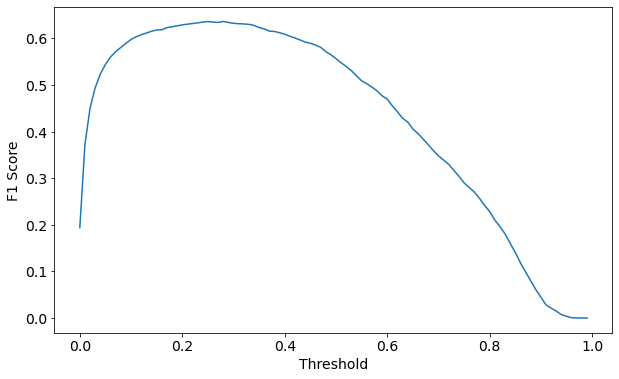

In [113]:
clf = LGBMClassifier(n_estimators = 2000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.4,
                        reg_alpha = 1,
                        reg_lambda = 1
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting Prediction on the Leaderboard**

In [115]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [116]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [117]:
#storing to sample submission
ss['term_deposit_subscribed']=lgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\11LGBM_threshold_afterfeature_engineer.csv')

1. Your private score for this submission is : **0.64** (Validation Score:0.655)
2. Had it been a live contest, your rank would be : 22

## **Interaction Features**

Can any two features be combined to make more sense in the given dataset ?

In [120]:
df.head(2)

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,...,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,job_type_freq,day_of_month_freq,month_freq,num_contacts_in_campaign_freq,num_contacts_prev_campaign_freq
0,id_43823,28,0,0,0,0,285.0,0,0,0,...,4.0,NaN,0,0,0.0,9458,1035,5341,3510.0,36954
1,id_32289,34,1,1,1,0,934.0,1,1,1,...,2.0,132.0,1,1,0.0,9732,2308,3970,12454.0,2772


In [121]:
df[['month', 'day_of_month']].head()

,month,day_of_month
0,0,26
1,1,18
2,2,5
3,3,20
4,3,13


combining and labeling

In [122]:
df['month_and_day_of_month'] = pd.factorize(df['month'].astype('str') + df['day_of_month'].astype('str'))[0]

In [126]:
df['month_and_day_of_month']

0          0
1          1
2          2
3          3
4          4
        ... 
45206    139
45207     41
45208    108
45209      4
45210     92
Name: month_and_day_of_month, Length: 45211, dtype: int64

In [130]:
df['month_and_day_of_month'].nunique()

311

we have records for 311/365 days 

In [131]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

12. **LGBM after Feature Engineering with Frequency Features**


------------- Fold 1 -------------
Training until validation scores don't improve for 400 rounds
[200]	valid_0's binary_logloss: 0.207023
[400]	valid_0's binary_logloss: 0.179542
[600]	valid_0's binary_logloss: 0.169838
[800]	valid_0's binary_logloss: 0.165573
[1000]	valid_0's binary_logloss: 0.16355
[1200]	valid_0's binary_logloss: 0.162278
[1400]	valid_0's binary_logloss: 0.161476
[1600]	valid_0's binary_logloss: 0.161175
[1800]	valid_0's binary_logloss: 0.161012
[2000]	valid_0's binary_logloss: 0.160904
[2200]	valid_0's binary_logloss: 0.160987
Early stopping, best iteration is:
[1953]	valid_0's binary_logloss: 0.160874

F1 score for validation set is 0.5816993464052287

------------- Fold 2 -------------
Training until validation scores don't improve for 400 rounds
[200]	valid_0's binary_logloss: 0.20392
[400]	valid_0's binary_logloss: 0.176121
[600]	valid_0's binary_logloss: 0.166454
[800]	valid_0's binary_logloss: 0.162191
[1000]	valid_0's binary_logloss: 0.159971
[1200]	valid_0

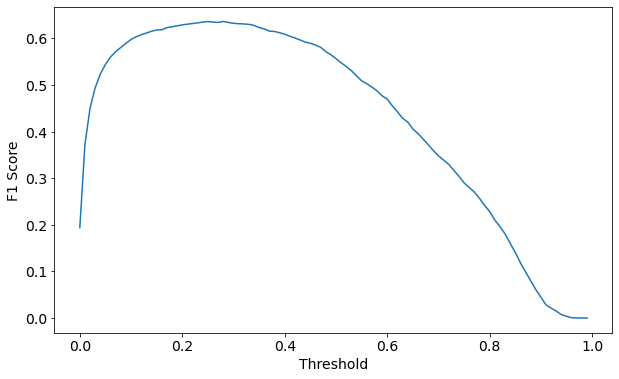

In [132]:
clf = LGBMClassifier(n_estimators = 3000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.38,
                        reg_alpha = 1,
                        reg_lambda = 1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 400}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

**Submitting Prediction on the Leaderboard**

In [134]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [135]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)

In [138]:
#storing to sample submission
ss['term_deposit_subscribed']=lgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\12LGBM_threshold_afterfeature_engineer2.csv')

1. Your private score for this submission is : **0.6436** (Validation Score:0.656)
2. Had it been a live contest, your rank would be : 15

**EDA and features from EDA**

In [140]:
df['month_and_day_of_month'].value_counts()

47     1126
31     1011
4      1002
11      891
45      841
       ... 
308       1
309       1
293       1
310       1
300       1
Name: month_and_day_of_month, Length: 311, dtype: int64

In [141]:
df = get_frequency_features(df, ['month_and_day_of_month'])
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

In [143]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1


------------- Fold 1 -------------
Training until validation scores don't improve for 400 rounds
[200]	valid_0's binary_logloss: 0.201486
[400]	valid_0's binary_logloss: 0.175202
[600]	valid_0's binary_logloss: 0.167632
[800]	valid_0's binary_logloss: 0.163285
[1000]	valid_0's binary_logloss: 0.161989
[1200]	valid_0's binary_logloss: 0.160546
[1400]	valid_0's binary_logloss: 0.15992
[1600]	valid_0's binary_logloss: 0.159688
[1800]	valid_0's binary_logloss: 0.159595
[2000]	valid_0's binary_logloss: 0.159611
[2200]	valid_0's binary_logloss: 0.159789
Early stopping, best iteration is:
[1892]	valid_0's binary_logloss: 0.159496

F1 score for validation set is 0.592891760904685

------------- Fold 2 -------------
Training until validation scores don't improve for 400 rounds
[200]	valid_0's binary_logloss: 0.197878
[400]	valid_0's binary_logloss: 0.171483
[600]	valid_0's binary_logloss: 0.164119
[800]	valid_0's binary_logloss: 0.159896
[1000]	valid_0's binary_logloss: 0.158662
[1200]	valid_0

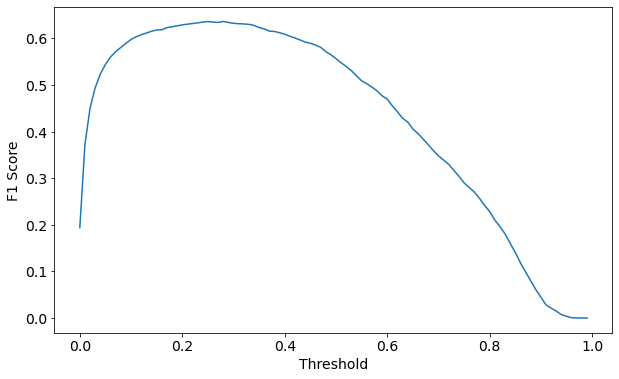

In [146]:
clf = LGBMClassifier(n_estimators = 3000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.38,
                        reg_alpha = 1,
                        reg_lambda = 1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 400}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_proc, test_proc, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

In [147]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

# **Ensembling**




In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.



* What are our best performing algorithms ?
* How do we combine these algorithms to get a better performance ?

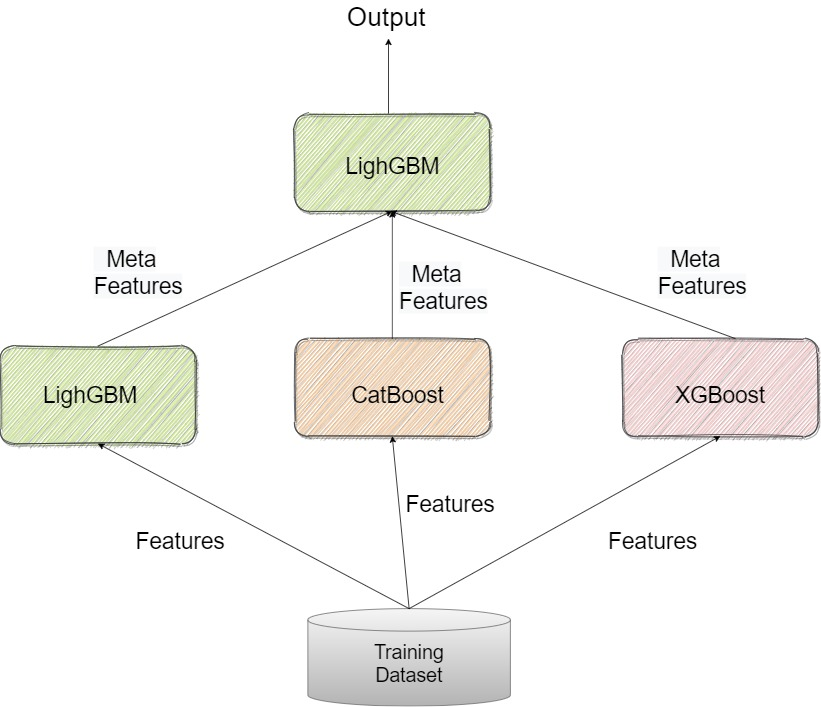

https://bit.ly/2SFgrnb

In [148]:
train_new = train[[ID_COL, TARGET_COL]]
test_new = test[[ID_COL]]

train_new['lgb'] = lgb_oofs
test_new['lgb'] = lgb_preds

train_new['cb'] = cb_oofs
test_new['cb'] = cb_preds

train_new['xgb'] = xgb_oofs
test_new['xgb'] = xgb_preds

features = [c for c in train_new.columns if c not in [ID_COL, TARGET_COL]]

In [150]:
features

['lgb', 'cb', 'xgb']


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.169769
[400]	valid_0's binary_logloss: 0.161522
[600]	valid_0's binary_logloss: 0.162069
Early stopping, best iteration is:
[438]	valid_0's binary_logloss: 0.161443

F1 score for validation set is 0.6172465960665658

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.16629
[400]	valid_0's binary_logloss: 0.156443
[600]	valid_0's binary_logloss: 0.155608
Early stopping, best iteration is:
[577]	valid_0's binary_logloss: 0.155599

F1 score for validation set is 0.6222910216718266

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds
[200]	valid_0's binary_logloss: 0.168613
[400]	valid_0's binary_logloss: 0.159681
[600]	valid_0's binary_logloss: 0.159128
Early stopping, best iteration is:
[551]	valid_0's binary_logloss: 0.159107

F1 scor

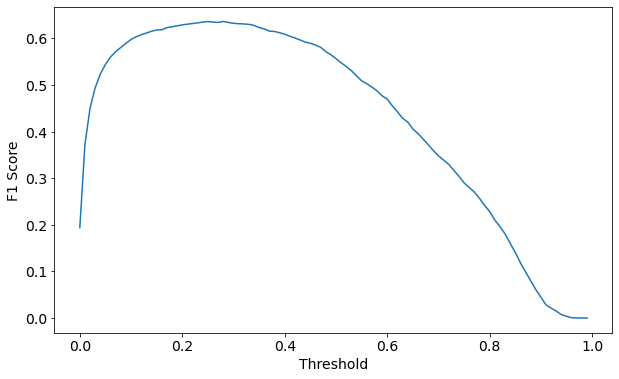

In [151]:
clf = LGBMClassifier(n_estimators = 2000,
                        learning_rate = 0.01,
                        colsample_bytree = 0.75,
                        reg_alpha=1,
                        reg_lambda=1,
                        )
fit_params = {'verbose': 200, 'early_stopping_rounds': 200}
lgb_oofs, lgb_preds = run_gradient_boosting(clf, fit_params, train_new, test_new, features)

optimal_thresh = get_optimal_f1_thresh(target, lgb_oofs)
print(f'Optimal threhold is {optimal_thresh}')
optimized_f1 = f1_score(target, (lgb_oofs > optimal_thresh) * 1)
print(f'Optimized F1 is {optimized_f1}')

In [152]:
lgb_preds_rounded = (lgb_preds > optimal_thresh) * 1

In [155]:
#Preparing sample submission again
ss.drop(["term_deposit_subscribed"], axis=1, inplace=True)
#storing to sample submission
ss['term_deposit_subscribed']=lgb_preds_rounded
#formating sample submission
ss['term_deposit_subscribed']=ss['term_deposit_subscribed'].astype(int)
ss.head(1)
#exporting to sample submission
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\Guided Hackathon\\13ensemble.csv')

1. Your private score for this submission is : **0.6436** (Validation Score:0.655)
2. Had it been a live contest, your rank would be : 16

# #Feature Engineering 4 : Upsampling

1. Because the **target feature is highly imbalanced**, we need to upsample train data ,to avoid biases in results,

2. **train_proc** is a data frame with "term_deposit_subscribed" as the target column with classes 0 and 1.  


In [76]:
from sklearn.utils import resample

# Separate majority and minority classes
train_majority = train_proc.loc[train_proc.term_deposit_subscribed == 0].copy()
train_minority = train_proc.loc[train_proc.term_deposit_subscribed == 1].copy()

print(train_proc.term_deposit_subscribed.value_counts())


0.0    28253
1.0     3394
Name: term_deposit_subscribed, dtype: int64


In [77]:
# Upsample minority class
train_minority_upsampled = resample(train_minority,
                             replace=True,     # sample with replacement
                             n_samples=28253,  # to match majority class
                             random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

# Display new class counts
print(train_upsampled.term_deposit_subscribed.value_counts())

1.0    28253
0.0    28253
Name: term_deposit_subscribed, dtype: int64


#    Feature-Target split